In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import nltk

import seaborn as sns

from nltk.corpus import stopwords

import string

from nltk.stem import PorterStemmer

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [3]:
#reading the CSV file
x = pd.read_csv("/content/drive/MyDrive/petsi/spam.csv")

#displaying the dataframe
x

,label,messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ?_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#dataset size - 5572 rows x 5 columns
x.shape

(5572, 5)

## Data Cleaning

In [5]:
#printing the concise summary of the dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   messages    5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#column 2, 3, 4 have majority missing values, so it is better to drop them.
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

#displaying the edited dataframe
x

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#renaming the column names to a better and meaningful column name
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)

#displaying the edited dataframe
x

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#result has categorical labels, we need to convert it into numerical values - enbcoding
#for that we will be using 'LabelEncoder' from sklearn

In [8]:
encoder = LabelEncoder()
x['label'] = encoder.fit_transform(x['label'])

#displaying the edited dataframe
x.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#so 0 means no SPAM, 1 means SPAM

In [9]:
#check if there is any NULL value
x.isnull().sum()

label       0
messages    0
dtype: int64

In [ ]:
#the dataset has NO null values, so don't need to handle them

In [ ]:
#check if there is any DUPLICATE values
x.duplicated().sum()

403

In [10]:
#the dataset has DUPLICATE values, so we will have to REMOVE them
x = x.drop_duplicates(keep='first')

#displaying the edited dataframe
x

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ?_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#rows reduced from 5572 to 5169 after DUPLICATED values have been deleted

## EDA - Exploratory Data Analysis

In [ ]:
#the given problem is a classification problem, so we need to understand the data first by performing EDA.
#the dataset has only 2 columns, so less analysis required.

In [11]:
#checking the number of SPAM vs not SPAM messages
x['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [ ]:
#out of 5169 datavalues, 653 are SPAM

In [12]:
653*100.0/5169

12.633004449603405

In [ ]:
#12.63% is SPAM and 87.37% is not SPAM

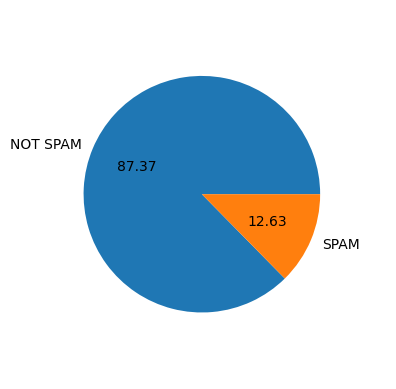

In [13]:
#for better representation, we can use PIE CHART to represent it.
#PIE CHARTS can be created using matplotlib library

plt.pie(x['label'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [ ]:
#hence, highly IMBALANCED DATA

In [14]:
#now we will be analysing the number of alphabets/words/sentences being used in the TEXT
#for this, will create 3 new columns: (1) no. of characters (2) no. of words (3) no. of sentences in SMS

#using 'nltk' library for this.
#Natural Language Toolkit for text processing
#(pip install nltk)

In [15]:
#downloading the dependencies
#punkt package includes pre-trained models for tokenizing text in many languages

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#creating a new column with count of characters
x['countCharacters'] = x['messages'].apply(len)

#creating a new column with count of words
x['countWords'] = x['messages'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['messages'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

<ipython-input-16-bb2d66cf0968>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countCharacters'] = x['messages'].apply(len)
<ipython-input-16-bb2d66cf0968>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['countWords'] = x['messages'].apply(lambda i:len(nltk.word_tokenize(i)))
<ipython-input-16-bb2d66cf0968>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [17]:
#displaying the edited dataframe with the 3 new columns added
x.head()

,label,messages,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
#extracting the 5 number summary of the 3 new column values
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.893983,18.592765,2.005223
std,58.162165,13.395304,1.476261
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,116.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [ ]:
#extracting the same summaries, classified on the basis of SPAM and not SPAM

In [19]:
#for not SPAM
x[x['label'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.423826,17.211692,1.863596
std,56.337586,13.525429,1.418590
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
#for SPAM
x[x['label'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.471669,28.143951,2.984686
std,30.019848,7.132668,1.496339
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

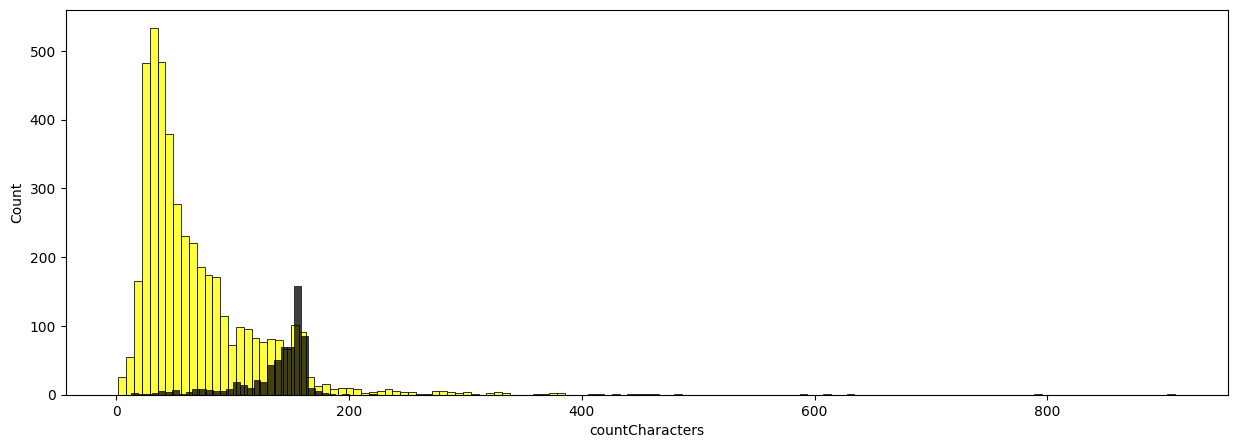

In [21]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['label'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['label'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

<Axes: xlabel='countWords', ylabel='Count'>

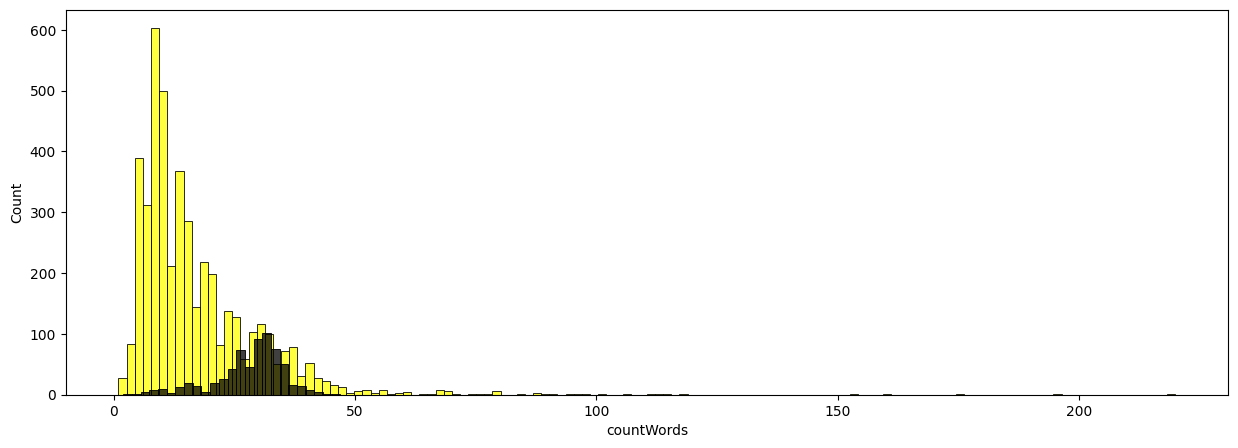

In [22]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['label'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['label'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

In [ ]:
#observation : SPAM messages have more no of characters used, mean is 137.89 for SPAM and 70.45 for not SPAM

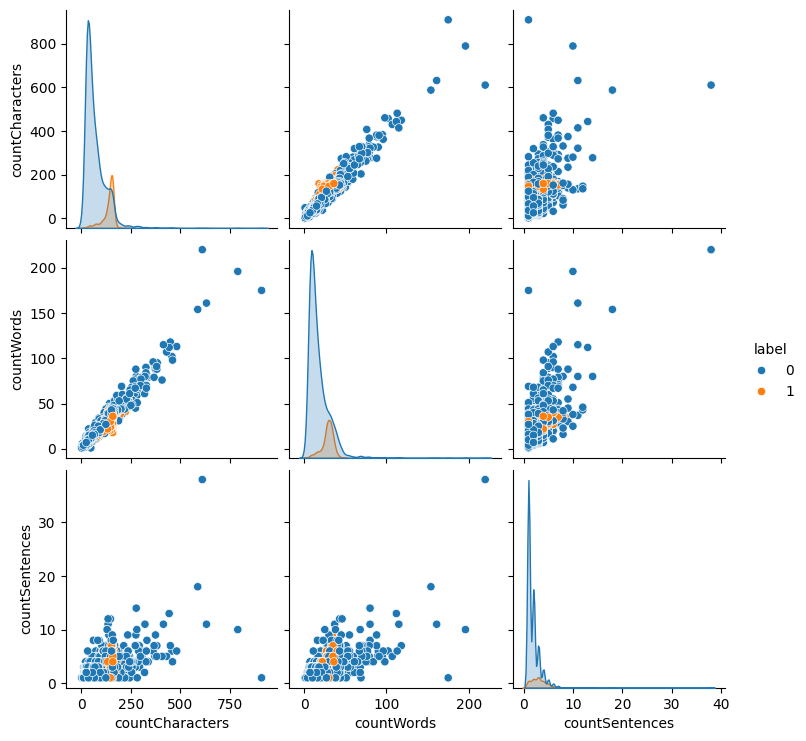

In [23]:
#finding relationship between the columns
sns.pairplot(x, hue='label')

In [24]:
#find pearson's correlation coefficient
x.corr()

<ipython-input-24-05d802811da3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,label,countCharacters,countWords,countSentences
label,1.000000,0.383013,0.271160,0.252317
countCharacters,0.383013,1.000000,0.966873,0.610315
countWords,0.271160,0.966873,1.000000,0.670147
countSentences,0.252317,0.610315,0.670147,1.000000


<ipython-input-25-03a2b75c2e2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr(), annot=True)


<Axes: >

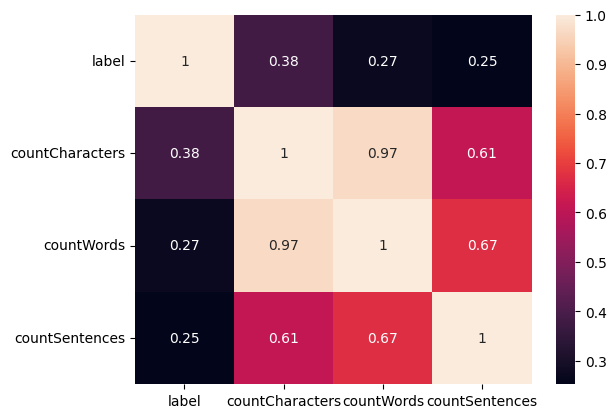

In [25]:
#converting it into a heatmap
sns.heatmap(x.corr(), annot=True)

In [ ]:
#multi-collinearity in the dataset
#all new 3 columns are highly correlated with each other but countCharacters is correlated more with the 'result' than any other column

## Data Preprocessing

In [26]:
#peforming preprocessing such as tokenization (converting the text into tokens or words), removing special characters,
#removing stop words and punctuation and finallying stemming the data.
#also, converting to lower case first and then pre-processing the data

In [27]:
#downloading the package which contains the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def transform_text (text):

    #converting to lower case
    text = text.lower()

    #tokenization
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    #updating the text after removed special characters
    text = removedSC[:]

    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]

    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))

    text = stemmed[:]

    return " ".join(text)

In [29]:
#function for transforming the text is ready

In [30]:
#will create a new column to store the transformed text -> 'processed'
x['processed'] = x['messages'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

<ipython-input-30-68a61ab2dfcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['processed'] = x['messages'].apply(transform_text)


,label,messages,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

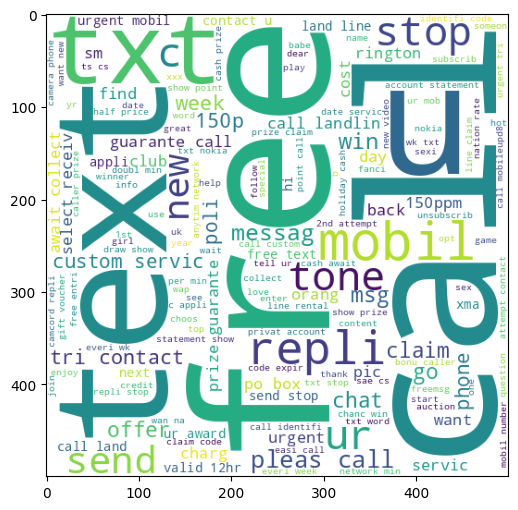

In [32]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(x[x['label'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

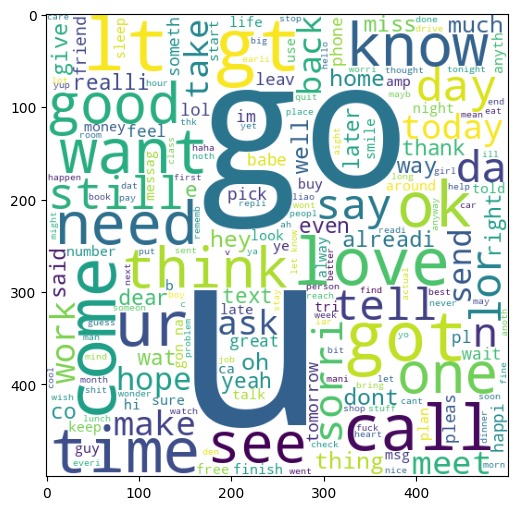

In [33]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(x[x['label'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [ ]:
#extracting the most common words used in both SPAM and not SPAM messages

In [34]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['label'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '

In [35]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 325),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 46),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('1000', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35)]

In [36]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

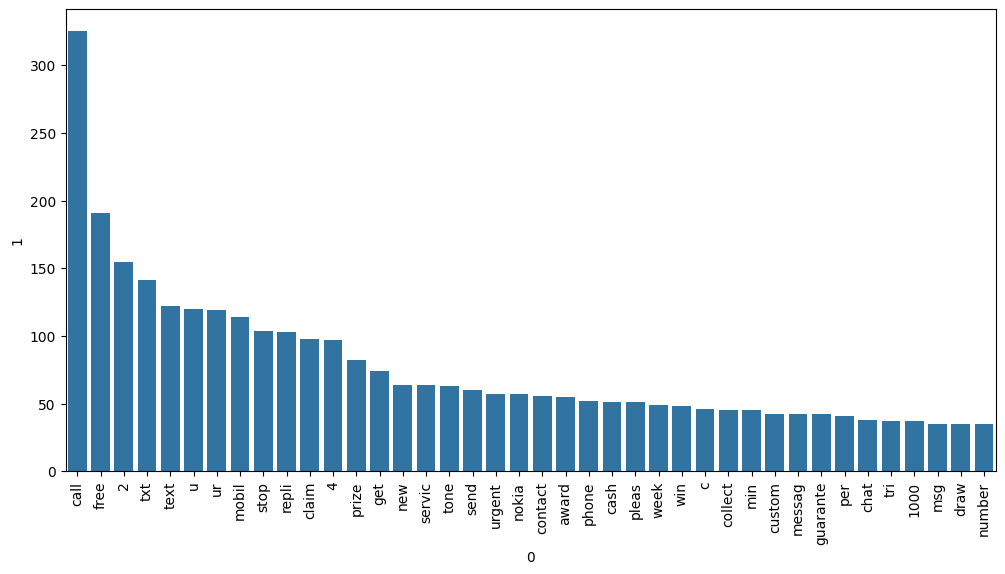

In [37]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

## Model Building

In [38]:
#NaiveBayes classifier works BEST on textual data, so will firstly perform it on the dataset.

In [ ]:
#we need to give numerical inputs to the classifier model, so will have to convert the 'processed' column into vectors.
#using 'bag of words'

In [40]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [41]:
#transforming the data of processed column
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(5169, 6704)

In [42]:
#storing the values of the 'result' column
y = x['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [43]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic data
seq_length = 10
input_dim = 5
output_dim = 2
num_samples = 1000

X = np.random.randn(num_samples, seq_length, input_dim).astype(np.float32)
y = np.random.randint(0, output_dim, size=(num_samples, seq_length)).astype(np.float32)

# Create RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(seq_length, input_dim), return_sequences=True),
    Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10)
# Evaluate the model



Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 0.7291 - accuracy: 0.4910
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5125
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5233
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5279
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5389
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5359
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5461
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5496
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.5574
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.5508


In [45]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic data
seq_length = 10
input_dim = 5
output_dim = 2
num_samples = 1000

X = np.random.randn(num_samples, seq_length, input_dim).astype(np.float32)
y = np.random.randint(0, output_dim, size=(num_samples, seq_length)).astype(np.float32)

# Create RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(seq_length, input_dim), return_sequences=True),
    Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10)

# Save the model
model.save('rnn_model.h5')


Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 0.7236 - accuracy: 0.4969
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5141
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5216
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5221
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5295
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5368
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5429
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5509
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5479
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5556


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
#using 'TfidfVectorizer' for vectorization
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['messages']).toarray()

#storing the values of the 'result' column
y = x['label'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

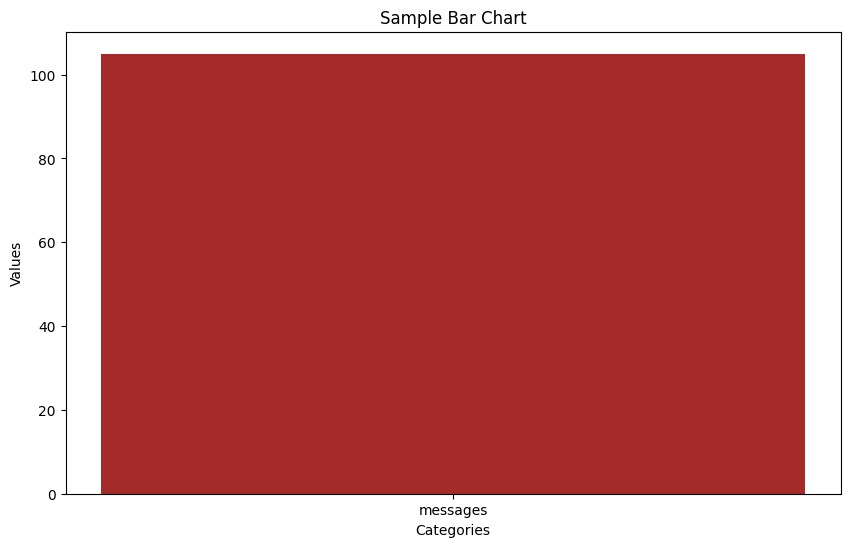

In [48]:
import matplotlib.pyplot as plt

# Sample data
categories = ['messages']
values = [105]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='brown')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [52]:
import pickle

In [51]:
import os
import pickle
if os.path.isfile(r"vectorizer.pkl"):
    print("File Exists")
else:
    pickle.dump(tf,open(r'/content/drive/MyDrive/petsi/vectorizer.pkl','wb'))
    print("Model Loaded!")

Model Loaded!
